In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
import os

In [56]:
os.chdir('D:\Leon Projects\Python\Vedenie v ML\Ved ml_week5')

In [2]:
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor
# Градиентный бустер для класс. и негрессии
# n_estimators, learning_rate поля для установки гиперпараметор
# Verbose - если надо, для отслежевания обучения
# staged_decision_function - функция высчитывающая качемтво композиции на каждойитерации 

In [3]:
from sklearn.cross_validation import train_test_split

In [4]:
from sklearn.metrics import log_loss

In [5]:
data = pd.read_csv('gbm-data.csv')

In [10]:
data.columns[data.mean() > 1]

Index([u'Activity', u'D1', u'D2', u'D3', u'D4', u'D5', u'D6', u'D7', u'D8',
       u'D9',
       ...
       u'D1767', u'D1768', u'D1769', u'D1770', u'D1771', u'D1772', u'D1773',
       u'D1774', u'D1775', u'D1776'],
      dtype='object', length=1777)

In [6]:
np_data = data.values

In [7]:
y = np_data[:,0]

In [8]:
x = np_data[:,1:]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.8, random_state=241)

In [10]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

In [18]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [43]:
train_forest_loss=[]
test_forest_loss=[]
for l in learning_rate:
    gbc = GradientBoostingClassifier(n_estimators=250,
                                     verbose=True,random_state=241,learning_rate=l)
    gbc.fit(x_train,y_train)
    train_loss=[]
    test_loss=[]
    for store in gbc.staged_decision_function(x_train):
        train_loss.append(log_loss(y_train,sigmoid(store)))
        #st = store
        #break
    for store in gbc.staged_decision_function(x_test):
        test_loss.append(log_loss(y_test,sigmoid(store)))
    train_forest_loss.append(train_loss)
    test_forest_loss.append(test_loss)

      Iter       Train Loss   Remaining Time 
         1           1.0190            3.26m
         2           0.9192            3.22m
         3           0.8272            3.22m
         4           0.7834            3.20m
         5           0.7109            3.19m
         6           0.6368            3.23m
         7           0.5797            3.21m
         8           0.5610            3.18m
         9           0.5185            3.17m
        10           0.4984            3.15m
        20           0.1999            2.96m
        30           0.1313            2.80m
        40           0.0790            2.67m
        50           0.0511            2.54m
        60           0.0352            2.41m
        70           0.0245            2.28m
        80           0.0162            2.16m
        90           0.0114            2.03m
       100           0.0077            1.90m
       200           0.0004           34.35s
      Iter       Train Loss   Remaining Time 
        

In [46]:
np.asarray(test_forest_loss).shape

(5, 250)

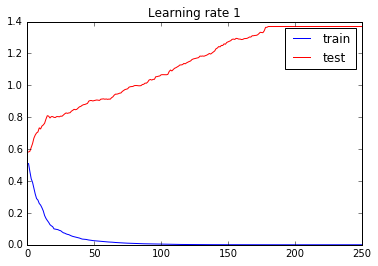

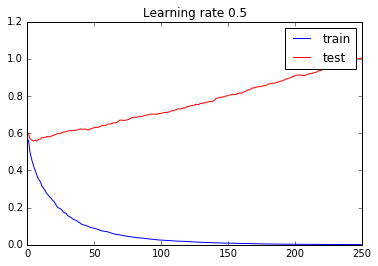

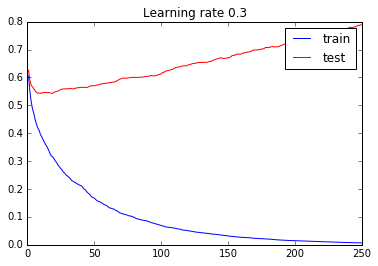

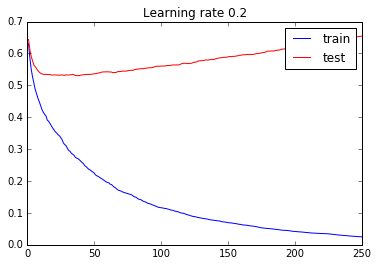

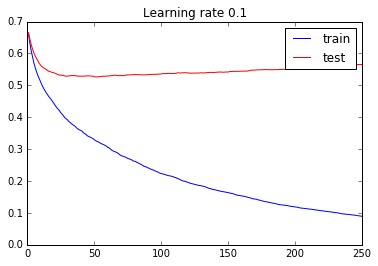

In [49]:
lens = len(train_forest_loss[0])
for i in range(0,len(learning_rate)):
    plt.plot(range(1,lens+1),train_forest_loss[i],'b')
    plt.plot(range(1,lens+1),test_forest_loss[i],'r')
    plt.legend(['train', 'test'])
    plt.title('Learning rate %s' % learning_rate[i])
    plt.show()

In [58]:
for i in range(0,len(learning_rate)):
    if learning_rate[i] == 0.2:
        rate = np.asarray(test_forest_loss[i])
        val_ans = rate.min()
        idx_ans = rate.argmin()
        print idx_ans, val_ans

36 0.530581065531


In [61]:
mod = GradientBoostingClassifier(n_estimators=idx_ans,random_state=241)
mod.fit(x_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=36,
              presort='auto', random_state=241, subsample=1.0, verbose=0,
              warm_start=False)

In [66]:
pred_ans = log_loss(y_test,mod.predict_proba(x_test)[:,1])

In [57]:
txt= open('subweek5_2_1.txt','w')
txt.write('overfitting')
txt.close()

In [59]:
txt= open('subweek5_2_2.txt','w')
txt.write('%.2f %s' % (val_ans,idx_ans))
txt.close()

In [67]:
txt= open('subweek5_2_3.txt','w')
txt.write('%.2f' % (pred_ans))
txt.close()